# Project: Medical Appointment No Shows

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project I will analyze data related to information from 100k medical appointments in Brazil, this dataset is focused on the question of whether or not patients show up for their appointment. During this project, I will try to find different correlations between NoShow factor and other factors.

### Research Questions:

<br>**Q1**: Who missed the most scheduled appointments? Males or Females?
<br>
<br>**Q2**: What is the relationship between the patient's age range and his commitment to the scheduled appointment?
<br>
<br>**Q3**: Are the range time between the scheduled date and the date of the appointment correlated to the commitment of the patient?
<br>
<br>**Q4**: How SMS_Received and NoShow factors are related?


In [2]:
#importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

## Data gathering:

To start I will use pandas read_csv method to read the dataset's CSV file as a DataFrame.

In [6]:
# Loading data and printing out a few lines. 
df = pd.read_csv('dataset/noshowappointments-kagglev2-may-2016.csv')
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


## Data assessment
In this analysis section, I will try to assess the data quality to check if there are changes to make on the dataset.

In [7]:
#DataFrame shape
df.shape

(110527, 14)

In [8]:
#missing values
df[df.isnull().any(axis=1)]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [9]:
#Duplicated rows
sum(df.duplicated())

0

In [10]:
#   types and look for instances of missing or possibly errant data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [11]:
#statistical insights
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [12]:
#How many rows with age less than or equal to zero
df[df['Age']<0]['Age'].count()

1

### Data Cleaning :
Fortunately, this dataset contains no missing values, no duplicated rows, it has 14 columns and 110527 rows. I can see also the ScheduledDay and AppointmentDay columns in incorrect forms, so I have to convert them into datetime.
<br>After reading the columns description I understood that ScheduledDay is the day the patient registered the appointment, and the AppointmentDay is the day of the actual appointment, that means the Appointment Day must be after the Scheduled Day, however, after printing out some rows, there are cases where the appointment day is before the scheduled day. so I have to dig deeper to understand more this problematic.
<br>The last thing I noticed during this assessment process, there is one row where the age is a negative number so I decided to drop it.

In [13]:
#Drop negative age
df.drop(df[df['Age']<0].index)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [14]:
#convert ScheduledDay and AppointmentDay columns to datetime
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [15]:
#check the changes
df['ScheduledDay'].dtype, df['AppointmentDay'].dtype

(datetime64[ns, UTC], datetime64[ns, UTC])

In [16]:
#Check if there are rows where the ScheduledDay is greater than the AppointmentDay.
df[df['AppointmentDay']<df['ScheduledDay']]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110511,8.235996e+11,5786742,F,2016-06-08 08:50:20+00:00,2016-06-08 00:00:00+00:00,14,MARIA ORTIZ,0,0,0,0,0,0,No
110512,9.876246e+13,5786368,F,2016-06-08 08:20:01+00:00,2016-06-08 00:00:00+00:00,41,MARIA ORTIZ,0,0,0,0,0,0,No
110513,8.674778e+13,5785964,M,2016-06-08 07:52:55+00:00,2016-06-08 00:00:00+00:00,2,ANTÔNIO HONÓRIO,0,0,0,0,0,0,No
110514,2.695685e+12,5786567,F,2016-06-08 08:35:31+00:00,2016-06-08 00:00:00+00:00,58,MARIA ORTIZ,0,0,0,0,0,0,No


The first thing I noticed in the AppointmentDay column, the time is always '00:00:00+00:00', seemingly the clinics don't give the exact time and fix only the day of the appointment. So if it's the case, there will be some patients who called and fix an appointment on the same day.
<br>To fix this problem I will change the AppointmentDay's time to the last second by adding 23 hours, 59 min and 59 seconds, and see if they remain rows where the ScheduledDay is greater than the AppointmentDay.
Finally, I will create a new column named 'AwaitingTime' which contains the difference in days between AppointmentDay and ScheduledDay.

In [17]:
#Add 23 hours, 59 min and 59 seconds to the appointment day
df['AppointmentDay'] = df['AppointmentDay'] + pd.Timedelta('1d') - pd.Timedelta('1s')

In [18]:
#Create the awaiting column
df['AwaitingTime'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days

In [19]:
#Find rows with negative awaiting time
df[df['AwaitingTime']<0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,AwaitingTime
27033,7.839273e+12,5679978,M,2016-05-10 10:51:53+00:00,2016-05-09 23:59:59+00:00,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,-1
55226,7.896294e+12,5715660,F,2016-05-18 14:50:41+00:00,2016-05-17 23:59:59+00:00,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,-1
64175,2.425226e+13,5664962,F,2016-05-05 13:43:58+00:00,2016-05-04 23:59:59+00:00,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,-1
71533,9.982316e+14,5686628,F,2016-05-11 13:49:20+00:00,2016-05-05 23:59:59+00:00,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,-6
72362,3.787482e+12,5655637,M,2016-05-04 06:50:57+00:00,2016-05-03 23:59:59+00:00,7,TABUAZEIRO,0,0,0,0,0,0,Yes,-1


Now there is only five rows with negative awaiting time, so I decided to drop them.

In [20]:
df.drop(df[df['AwaitingTime']<0].index, inplace=True)

In [21]:
df[df['AwaitingTime']<0].count()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
AwaitingTime      0
dtype: int64

Finally, to facilitate the analysis I will convert the 'No-show' column into numerical data, for that I will give a value of 0 if the patient shows up, 1 instead. I will also change the column name to NoShow.

In [22]:
#Rename the column No-Show
df.rename(columns={'No-show':'NoShow'}, inplace=True)

In [23]:
#Convert NoShow column into numerical data
df.loc[df[df['NoShow'] == 'No'].index, 'NoShow'] = 0
df.loc[df[df['NoShow'] == 'Yes'].index, 'NoShow'] = 1

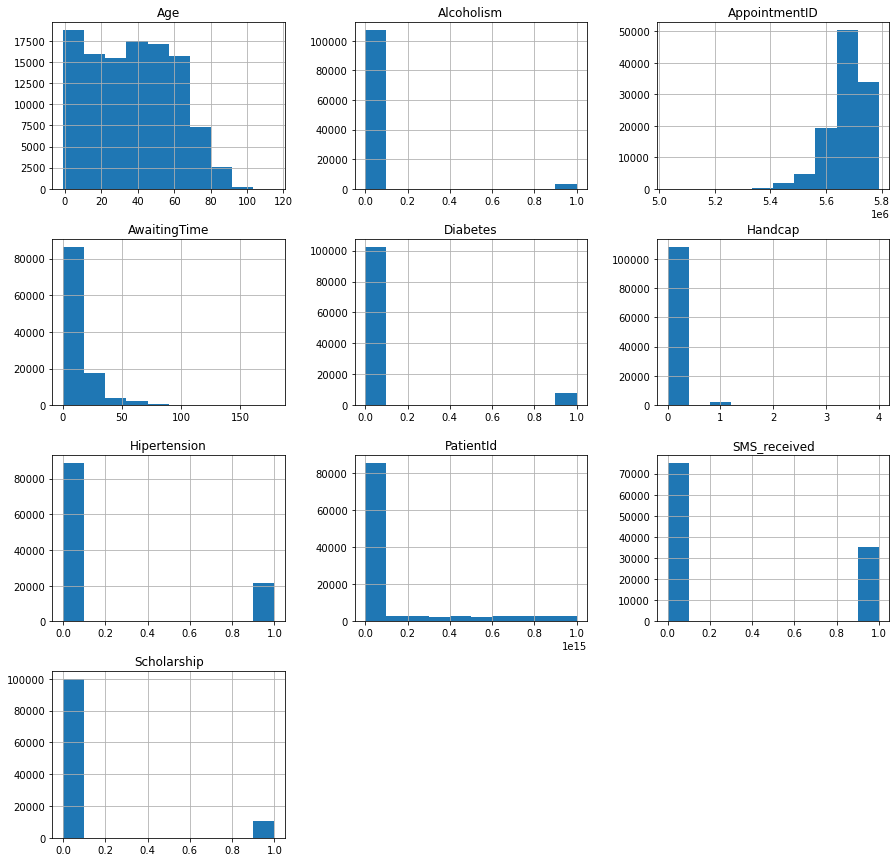

In [24]:
#now let's see the distribution of the dataset's features
df.hist(figsize=(15,15));

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 :Who missed the most scheduled appointments? Males or Females?
First of all, let's take a look at the gender histogram to see if there are more males or more females in the dataset

In [27]:
def bar_plot(x, height, title, xlabel, ylabel):
    plt.bar(x, height)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

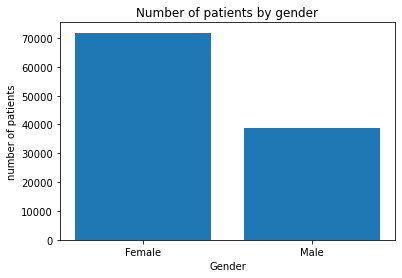

In [28]:
gender_title = "Number of patients by gender"
bar_plot(['Female', 'Male'], df['Gender'].value_counts(), gender_title, 'Gender', 'number of patients')

As we can see, there are more females than males in the dataset. Now let's take a look at the proportions of NoShows from males and females compared to the total number of patients

In [30]:
#Calculate the total numbers of males and females
total_ml = df.query('Gender == "M"')['Gender'].count()
total_fm = df.query('Gender == "F"')['Gender'].count()
(total_ml, total_fm)

(38685, 71837)

In [31]:
#Calculate the NoShow numbers of males and females
df_ns = df[df['NoShow']==1]
ns_ml = df_ns.query('Gender == "M"')['Gender'].count()
ns_fm = df_ns.query('Gender == "F"')['Gender'].count()
(ns_ml, ns_fm)

(7723, 14591)

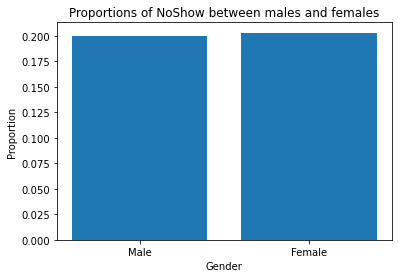

In [32]:
#Plot the NoShow proportions
prop_ml = ns_ml/total_ml
prop_fm = ns_fm/total_fm
ns_gender_title = 'Proportions of NoShow between males and females'
bar_plot(['Male', 'Female'], [prop_ml, prop_fm], ns_gender_title, 'Gender', 'Proportion')

The histogram shows no difference in proportions of no-show between males and females, which leads us to conclude there are approximately the same chances for males and females to miss there scheduled appointments.

### Research Question 2 : What is the relationship between the patient's age range and his commitment to the scheduled appointment? 
Now let's cut the age column into differents ranges and see if there are ranges that are more concerned with not showing up possibility. First of all, I will convert ages to groups and then create a new column 'AgeRange'. After that I will calculate proportions of NoShow age ranges compared to the global 'df' age ranges and finally, I will plot the obtained data.

In [39]:
#cut the age column into differents age ranges
agerange_labels = ['<10','10-19','20-29','30-39','40-49','50-59','60-70','>=70']
AgeRange = pd.cut(df.Age, [0,10,20,30,40,50,60,70,120], right=False, labels=age_labels)

In [40]:
#Create the AgeRange column
df['AgeRange'] = AgeRange

In [41]:
#calculate proportions of NoShow age ranges 
#compared to the global 'df' age ranges
prop_AgeRange = df[df['NoShow']==1]['AgeRange'].value_counts()/df['AgeRange'].value_counts()

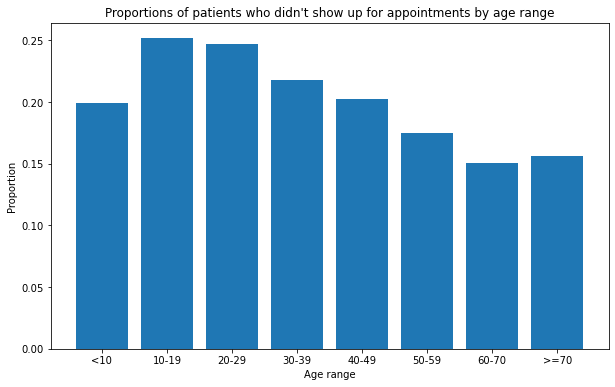

In [43]:
plt.figure(figsize=(10,6))
agerange_title = "Proportions of patients who didn't show up for appointments by age range"
bar_plot(agerange_labels, prop_AgeRange, agerange_title, 'Age range', 'Proportion')

## Note:
As we can see, patients whose age is between 10 and 29 are more likely to not show up to their scheduled appointments, while the oldest patients are the most committed to their appointments.

### Research Question 3 : Are the range time between the scheduled date and the date of the appointment correlated to the commitment of the patient?
To start I will create a new column with awaiting date ranges and then I will calculate proportions of patients 
Who didn't stick to their appointments by awaiting date ranges, and finally I will plot the data.

In [55]:
#Create a new column with awaiting time ranges
atp_labels = ['<2 days','2-4 days','5-10 days','10-19 days','20-29 days','30-39 days','40-49 days','50-69 days','>=70 days']
Awaiting_time_ranges = pd.cut(df.AwaitingTime, [0,2,5,10,20,30,40,50,70,140], right=False, labels=days_labels)
df['Awaiting_time_ranges'] = Awaiting_time_ranges

In [56]:
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,NoShow,AwaitingTime,AgeRange,Awaiting_time_ranges
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 23:59:59+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0,0,60-70,<2 days


In [57]:
#Calculate the proportions of persons who didn't stick to their appointment 
#by awaiting time ranges
ns_awaitingtime = df.query('NoShow==1').Awaiting_time_ranges.value_counts()
awaitingtime_prop = ns_awaitingtime/df.Awaiting_time_ranges.value_counts()

In [58]:
awaitingtime_prop

<2 days       0.066361
2-4 days      0.235697
5-10 days     0.265643
10-19 days    0.318528
20-29 days    0.331704
30-39 days    0.332330
40-49 days    0.346987
50-69 days    0.305400
>=70 days     0.289247
Name: Awaiting_time_ranges, dtype: float64

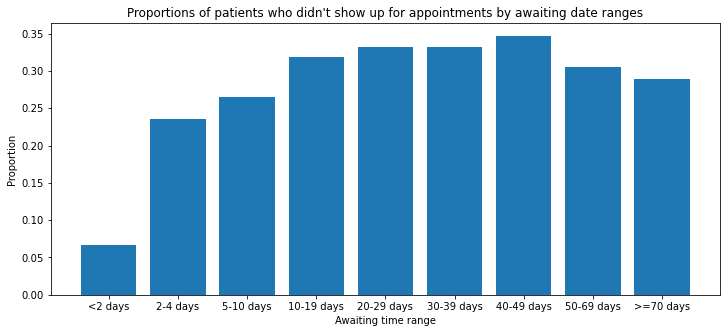

In [59]:
#Plot the proportions data
plt.figure(figsize=(12,5))
atp_title = "Proportions of patients who didn't show up for appointments by awaiting date ranges"
bar_plot(atp_labels, awaitingtime_prop, atp_title, 'Awaiting time range', 'Proportion')

As we can see, the proportion of patients who didn't show up for their scheduled appointment get higher with the awaiting time range. According to the previous bar chart, patients who fixed an appointment in less than two days are more likely to not miss it.

### Research Question 4 :How SMS_Received and NoShow factors are related ?
This is the last question I will answer to. In this analysis section I will try to find the impact of not receiving a reminder SMS on patient's commitment to the scheduled appointment.

In [60]:
#Number of patients who didn't show up to the scheduled appointment
df[df['NoShow']==1]['NoShow'].count()

22314

In [61]:
#Proportions of patients who did and who didn't receive an SMS 
prop_SMSreceived = df[df['NoShow']==1]['SMS_received'].value_counts()/df[df['NoShow']==1]['NoShow'].count()

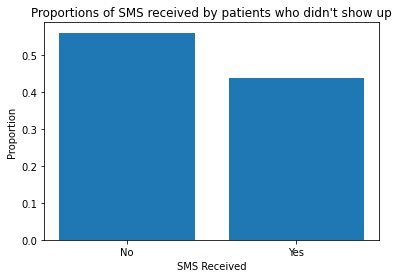

In [62]:
SMSReceived_title = "Proportions of SMS received by patients who didn't show up"
bar_plot(['No','Yes'],prop_SMSreceived, SMSReceived_title, 'SMS Received', 'Proportion')

## Note:
The bar chart tells us that there are more patients who didn't receive reminder SMS and did not show up to their appointments, compared to patients who  did receive reminder SMS and didn't show up.

<a id='conclusions'></a>
## Conclusions


To summrize, I started first by reading the dataset's csv file, assessing and cleanig the dataset. In the next section I tried to answer some related questions to the dataset:
<br>**Q1**: Who misses the most their scheduled appointments? Males or Females?
<br>I found no correlation between gender and NoShow factors.
<br>
<br>**Q2**: What is the relationship between the patient's age range and his commitment to the scheduled appointment?
<br>I found that the proportion of partients who didn't show up for their scheduled appointment get higher with the awaiting time range.
<br>
<br>**Q3**: Is the range time between the scheduled date and the date of the appointment correlated to the commitment of the patient?
<br>I found that the proportion of partients who didn't show up for their scheduled appointment get higher with the awaiting time range.
<br>
<br>**Q4**: How SMS_Received and NoShow factors are related ?
I found that there are more patients who didn't receive reminder SMS and did not show up to their appointments, than patients who did receive reminder SMS and didn't show up.

### Limitations:
The dataset still has limitations which hinder the quality of the analysis:
>**SMS_received column:** This column provides binary data, 1 if the patient received at least one SMS, 0 instead. In my opinion, to get more insights about SMS campaigns it will be better to have the number of SMS sent.